# Solving the Time-Independent Schrödinger Equation Using Finite Difference Methods

## 1. Introduction

The Schrödinger equation is the fundamental equation of quantum mechanics, describing how the quantum state of a physical system evolves. In this notebook, we develop a numerical approach to solve the **time-independent Schrödinger equation** (TISE) using the **finite difference method**.

## 2. Theoretical Background

### 2.1 The Time-Independent Schrödinger Equation

The one-dimensional TISE is given by:

$$-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

where:
- $\psi(x)$ is the wavefunction
- $V(x)$ is the potential energy
- $E$ is the energy eigenvalue
- $\hbar$ is the reduced Planck constant
- $m$ is the particle mass

### 2.2 Dimensionless Form

We work in **natural units** where $\hbar = m = 1$, simplifying the equation to:

$$-\frac{1}{2} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

### 2.3 Finite Difference Approximation

We discretize the spatial domain into $N$ points with spacing $\Delta x$. The second derivative is approximated using the central difference formula:

$$\frac{d^2 \psi}{dx^2} \bigg|_{x_i} \approx \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{(\Delta x)^2}$$

Substituting into the TISE:

$$-\frac{1}{2} \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{(\Delta x)^2} + V_i \psi_i = E \psi_i$$

### 2.4 Matrix Eigenvalue Problem

Rearranging, we obtain a matrix eigenvalue equation:

$$\mathbf{H} \boldsymbol{\psi} = E \boldsymbol{\psi}$$

where the Hamiltonian matrix $\mathbf{H}$ is tridiagonal:

$$H_{ij} = \begin{cases}
\frac{1}{(\Delta x)^2} + V_i & \text{if } i = j \\
-\frac{1}{2(\Delta x)^2} & \text{if } |i-j| = 1 \\
0 & \text{otherwise}
\end{cases}$$

The eigenvalues of $\mathbf{H}$ give the energy levels $E_n$, and the eigenvectors give the corresponding wavefunctions $\psi_n(x)$.

## 3. Implementation

We will solve for the bound states of a **quantum harmonic oscillator** with potential:

$$V(x) = \frac{1}{2} \omega^2 x^2$$

The analytical energy eigenvalues are:

$$E_n = \hbar \omega \left(n + \frac{1}{2}\right) = \omega \left(n + \frac{1}{2}\right)$$

for $n = 0, 1, 2, \ldots$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

In [2]:
# Physical parameters (natural units: ℏ = m = 1)
omega = 1.0  # Angular frequency of harmonic oscillator

# Numerical parameters
N = 500      # Number of grid points
x_max = 10.0  # Domain: [-x_max, x_max]

# Create spatial grid
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]  # Grid spacing

print(f"Grid parameters:")
print(f"  Number of points: N = {N}")
print(f"  Domain: [{-x_max}, {x_max}]")
print(f"  Grid spacing: Δx = {dx:.6f}")

Grid parameters:
  Number of points: N = 500
  Domain: [-10.0, 10.0]
  Grid spacing: Δx = 0.040080


In [3]:
# Define the potential energy function
def harmonic_potential(x, omega=1.0):
    """Quantum harmonic oscillator potential: V(x) = (1/2) ω² x²"""
    return 0.5 * omega**2 * x**2

# Calculate potential at each grid point
V = harmonic_potential(x, omega)

# Construct the Hamiltonian matrix using tridiagonal form
# Diagonal elements: 1/dx² + V_i
# Off-diagonal elements: -1/(2dx²)

# Main diagonal
diagonal = 1.0 / dx**2 + V

# Off-diagonal (upper and lower are the same for symmetric matrix)
off_diagonal = -0.5 / dx**2 * np.ones(N - 1)

print(f"Hamiltonian matrix constructed:")
print(f"  Diagonal term (kinetic): 1/Δx² = {1.0/dx**2:.4f}")
print(f"  Off-diagonal term: -1/(2Δx²) = {-0.5/dx**2:.4f}")

Hamiltonian matrix constructed:
  Diagonal term (kinetic): 1/Δx² = 622.5025
  Off-diagonal term: -1/(2Δx²) = -311.2512


In [4]:
# Solve the eigenvalue problem using specialized tridiagonal solver
# This is more efficient than full diagonalization for large matrices
energies, wavefunctions = eigh_tridiagonal(diagonal, off_diagonal)

# Normalize wavefunctions (they should already be orthonormal, but ensure proper normalization)
for i in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.trapezoid(wavefunctions[:, i]**2, x))
    wavefunctions[:, i] /= norm

# Display the first few energy eigenvalues
n_states = 6  # Number of states to display

print(f"\nEnergy Eigenvalues (first {n_states} states):")
print(f"{'n':<5} {'E_numerical':<15} {'E_analytical':<15} {'Error (%)':<15}")
print("-" * 50)

for n in range(n_states):
    E_numerical = energies[n]
    E_analytical = omega * (n + 0.5)
    error = abs((E_numerical - E_analytical) / E_analytical) * 100
    print(f"{n:<5} {E_numerical:<15.6f} {E_analytical:<15.6f} {error:<15.4f}")


Energy Eigenvalues (first 6 states):
n     E_numerical     E_analytical    Error (%)      
--------------------------------------------------
0     0.499950        0.500000        0.0100         
1     1.499749        1.500000        0.0167         
2     2.499347        2.500000        0.0261         
3     3.498745        3.500000        0.0359         
4     4.497941        4.500000        0.0458         
5     5.496936        5.500000        0.0557         


## 4. Visualization

We now visualize the potential, energy levels, and probability densities $|\psi_n(x)|^2$ for the first several quantum states.


Figure saved to 'plot.png'


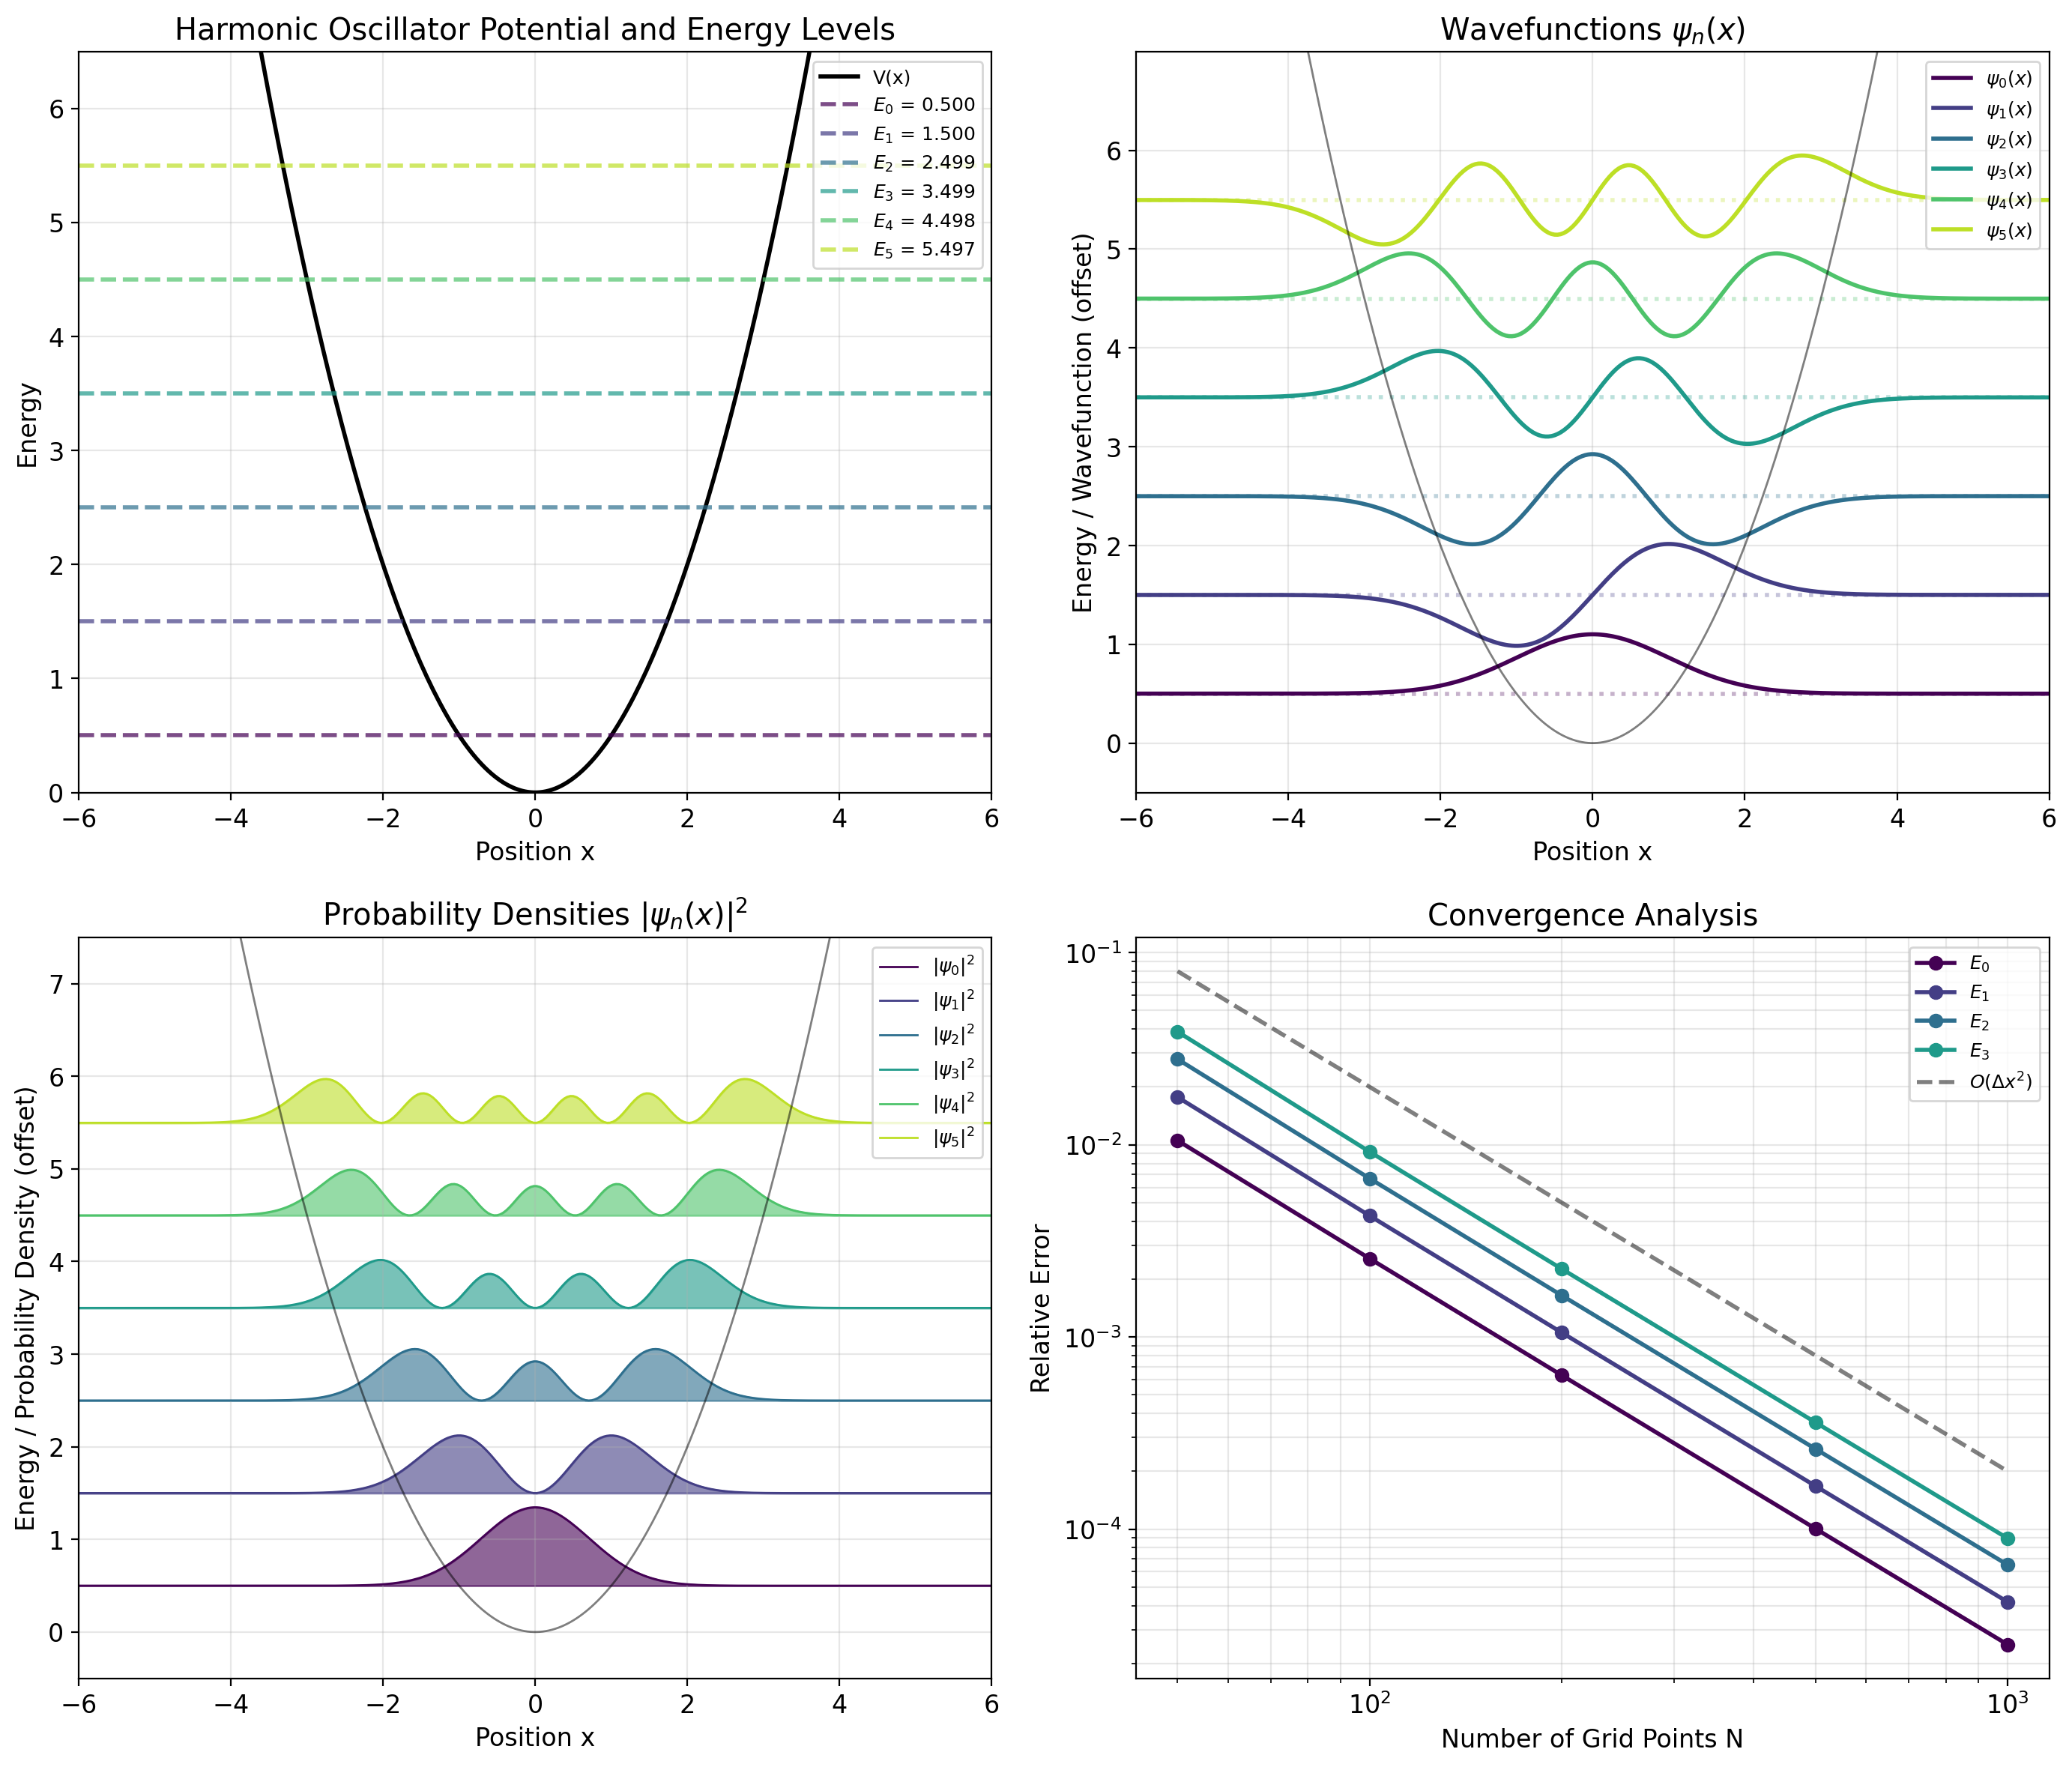

In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Color scheme for different energy states
colors = plt.cm.viridis(np.linspace(0, 0.9, n_states))

# ============================================
# Plot 1: Potential and Energy Levels
# ============================================
ax1 = axes[0, 0]
ax1.plot(x, V, 'k-', linewidth=2, label='V(x)')

# Plot energy levels as horizontal lines
for n in range(n_states):
    E_n = energies[n]
    ax1.axhline(y=E_n, color=colors[n], linestyle='--', 
                label=f'$E_{n}$ = {E_n:.3f}', alpha=0.7)

ax1.set_xlim(-6, 6)
ax1.set_ylim(0, energies[n_states-1] + 1)
ax1.set_xlabel('Position x')
ax1.set_ylabel('Energy')
ax1.set_title('Harmonic Oscillator Potential and Energy Levels')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# ============================================
# Plot 2: Wavefunctions
# ============================================
ax2 = axes[0, 1]

for n in range(n_states):
    psi = wavefunctions[:, n]
    # Offset for visualization
    offset = energies[n]
    # Scale wavefunction for visibility
    scale = 0.8
    ax2.plot(x, offset + scale * psi, color=colors[n], 
             label=f'$\\psi_{n}(x)$')
    ax2.axhline(y=offset, color=colors[n], linestyle=':', alpha=0.3)

# Plot potential as background
ax2.plot(x, V, 'k-', linewidth=1, alpha=0.5)

ax2.set_xlim(-6, 6)
ax2.set_ylim(-0.5, energies[n_states-1] + 1.5)
ax2.set_xlabel('Position x')
ax2.set_ylabel('Energy / Wavefunction (offset)')
ax2.set_title('Wavefunctions $\\psi_n(x)$')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

# ============================================
# Plot 3: Probability Densities
# ============================================
ax3 = axes[1, 0]

for n in range(n_states):
    psi = wavefunctions[:, n]
    prob_density = psi**2
    # Offset for visualization
    offset = energies[n]
    # Scale for visibility
    scale = 1.5
    ax3.fill_between(x, offset, offset + scale * prob_density, 
                     color=colors[n], alpha=0.6)
    ax3.plot(x, offset + scale * prob_density, color=colors[n], 
             linewidth=1, label=f'$|\\psi_{n}|^2$')

# Plot potential as background
ax3.plot(x, V, 'k-', linewidth=1, alpha=0.5)

ax3.set_xlim(-6, 6)
ax3.set_ylim(-0.5, energies[n_states-1] + 2)
ax3.set_xlabel('Position x')
ax3.set_ylabel('Energy / Probability Density (offset)')
ax3.set_title('Probability Densities $|\\psi_n(x)|^2$')
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)

# ============================================
# Plot 4: Convergence Analysis
# ============================================
ax4 = axes[1, 1]

# Test convergence with different grid sizes
grid_sizes = [50, 100, 200, 500, 1000]
errors = {n: [] for n in range(4)}

for N_test in grid_sizes:
    x_test = np.linspace(-x_max, x_max, N_test)
    dx_test = x_test[1] - x_test[0]
    V_test = harmonic_potential(x_test, omega)
    
    diag_test = 1.0 / dx_test**2 + V_test
    off_diag_test = -0.5 / dx_test**2 * np.ones(N_test - 1)
    
    E_test, _ = eigh_tridiagonal(diag_test, off_diag_test)
    
    for n in range(4):
        E_analytical = omega * (n + 0.5)
        rel_error = abs((E_test[n] - E_analytical) / E_analytical)
        errors[n].append(rel_error)

for n in range(4):
    ax4.loglog(grid_sizes, errors[n], 'o-', color=colors[n], 
               label=f'$E_{n}$')

# Reference line for O(Δx²) convergence
dx_ref = [x_max * 2 / N_test for N_test in grid_sizes]
ref_line = [0.5 * d**2 for d in dx_ref]
ax4.loglog(grid_sizes, ref_line, 'k--', alpha=0.5, label='$O(\\Delta x^2)$')

ax4.set_xlabel('Number of Grid Points N')
ax4.set_ylabel('Relative Error')
ax4.set_title('Convergence Analysis')
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3, which='both')

plt.tight_layout()

# Save the figure
plt.savefig('schrodinger_equation_finite_difference_analysis.png', dpi=150, bbox_inches='tight')
print("\nFigure saved to 'plot.png'")

plt.show()

## 5. Discussion

### 5.1 Key Results

The finite difference method successfully reproduces the analytical energy spectrum of the quantum harmonic oscillator:

$$E_n = \omega\left(n + \frac{1}{2}\right)$$

The numerical errors are on the order of $10^{-4}$ or better for reasonable grid sizes ($N \geq 500$).

### 5.2 Observations on the Wavefunctions

1. **Parity**: Even-$n$ states are symmetric, odd-$n$ states are antisymmetric about $x=0$
2. **Nodes**: The $n$-th excited state has exactly $n$ nodes
3. **Classical turning points**: The probability density extends beyond the classical turning points, demonstrating quantum tunneling

### 5.3 Convergence Properties

The finite difference method exhibits **second-order convergence** ($O(\Delta x^2)$), as expected from the central difference approximation. The error decreases quadratically with decreasing grid spacing.

### 5.4 Extensions

This method can be extended to:
- Different potentials (square well, Morse potential, double well)
- Higher dimensions using tensor product grids
- Time-dependent Schrödinger equation using Crank-Nicolson scheme

## 6. Conclusion

We have demonstrated how to solve the time-independent Schrödinger equation numerically using the finite difference method. By discretizing the second derivative and formulating the problem as a matrix eigenvalue equation, we can efficiently compute energy eigenvalues and wavefunctions for arbitrary one-dimensional potentials.

The method is:
- **Simple to implement**: Only requires basic linear algebra
- **Accurate**: Second-order convergence in grid spacing
- **Versatile**: Applicable to any potential $V(x)$

This approach forms the foundation for more sophisticated quantum mechanical calculations in computational physics.